## Preparation

In [1]:
!nvidia-smi

Thu Aug  1 19:55:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -U transformers accelerate bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [3]:
!pip install sentence_transformers==2.7.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.4 MB/s eta 0:00:00


## Q1. Getting the embeddings model

In [4]:
import pandas as pd

github_url = 'https://github.com/DataTalksClub/llm-zoomcamp/blob/main/04-monitoring/data/results-gpt4o-mini.csv'

url = f'{github_url}?raw=1'
df = pd.read_csv(url)
df = df.iloc[:300]

In [5]:
from sentence_transformers import SentenceTransformer

model_name = 'multi-qa-mpnet-base-dot-v1'
embedding_model = SentenceTransformer(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
answer_llm = df.iloc[0].answer_llm

v = embedding_model.encode(answer_llm)
v[0]

-0.42244664

## Q2. Computing the dot product

In [7]:
df

,answer_llm,answer_orig,document,question,course
0,You can sign up for the course by visiting the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Where can I sign up for the course?,machine-learning-zoomcamp
1,You can sign up using the link provided in the...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Can you provide a link to sign up?,machine-learning-zoomcamp
2,"Yes, there is an FAQ for the Machine Learning ...",Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Is there an FAQ for this Machine Learning course?,machine-learning-zoomcamp
3,The context does not provide any specific info...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,Does this course have a GitHub repository for ...,machine-learning-zoomcamp
4,To structure your questions and answers for th...,Machine Learning Zoomcamp FAQ\nThe purpose of ...,0227b872,How can I structure my questions and answers f...,machine-learning-zoomcamp
...,...,...,...,...,...
295,An alternative way to load the data using the ...,Above users showed how to load the dataset dir...,8d209d6d,What is an alternative way to load the data us...,machine-learning-zoomcamp
296,You can directly download the dataset from Git...,Above users showed how to load the dataset dir...,8d209d6d,How can I directly download the dataset from G...,machine-learning-zoomcamp
297,You can fetch data for homework using the `req...,Above users showed how to load the dataset dir...,8d209d6d,Could you share a method to fetch data for hom...,machine-learning-zoomcamp
298,If the status code is 200 when downloading dat...,Above users showed how to load the dataset dir...,8d209d6d,What should I do if the status code is 200 whe...,machine-learning-zoomcamp


In [8]:
import numpy as np
from tqdm import tqdm

answer_llm_embeddings = []
answer_orig_embeddings = []

for _, row in tqdm(df.iterrows()):
    answer_llm_embeddings.append(embedding_model.encode(row.answer_llm))
    answer_orig_embeddings.append(embedding_model.encode(row.answer_orig))

df['answer_llm_embedding'] = answer_llm_embeddings
df['answer_orig_embedding'] = answer_orig_embeddings
df['answers_dot_product'] = df.apply(lambda row: row.answer_llm_embedding.dot(row.answer_orig_embedding), axis=1)

300it [00:08, 34.04it/s]


In [9]:
evaluations = df['answers_dot_product'].to_list()
np.percentile(evaluations, 75)

31.674304962158203

## Q3. Computing the cosine

In [10]:
def normalize_vector(v):
    norm = np.sqrt((v * v).sum())
    if norm == 0:
        return v  # Avoid division by zero
    return v / norm

In [11]:
df['answer_llm_embedding_normalized'] = df['answer_llm_embedding'].apply(lambda v: normalize_vector(np.array(v)))
df['answer_orig_embedding_normalized'] = df['answer_orig_embedding'].apply(lambda v: normalize_vector(np.array(v)))

In [12]:
df['answers_cosine_similarity'] = df.apply(lambda row: row.answer_llm_embedding_normalized.dot(row.answer_orig_embedding_normalized), axis=1)

In [13]:
evaluations = df['answers_cosine_similarity'].to_list()
np.percentile(evaluations, 75)

0.8362347185611725

In [14]:
df['answers_cosine_similarity'].describe()

,answers_cosine_similarity
count,300.000000
mean,0.728392
std,0.157755
min,0.125357
25%,0.651273
50%,0.763761
75%,0.836235
max,0.958796


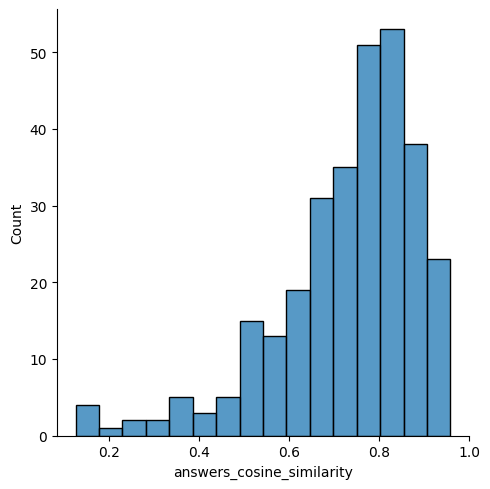

In [17]:
import seaborn as sns

sns.displot(df['answers_cosine_similarity'])

## Q4. Rouge

In [18]:
!pip install rouge

In [20]:
r = df.iloc[10]

In [21]:
from rouge import Rouge
rouge_scorer = Rouge()

scores = rouge_scorer.get_scores(r['answer_llm'], r['answer_orig'])[0]
scores

{'rouge-1': {'r': 0.45454545454545453,
  'p': 0.45454545454545453,
  'f': 0.45454544954545456},
 'rouge-2': {'r': 0.21621621621621623,
  'p': 0.21621621621621623,
  'f': 0.21621621121621637},
 'rouge-l': {'r': 0.3939393939393939,
  'p': 0.3939393939393939,
  'f': 0.393939388939394}}

## Q5. Average rouge score

In [22]:
sum([scores['rouge-1']['r'], scores['rouge-2']['r'], scores['rouge-l']['r']]) / 3

0.35490035490035493

## Q6. Average rouge score for all the data points

In [26]:
df['answers_rouge_score'] = df.apply(lambda row: rouge_scorer.get_scores(row['answer_llm'], row['answer_orig'])[0]['rouge-2']['r'], axis=1)

In [30]:
print(f"Average rouge_2 score: {df['answers_rouge_score'].describe()['mean']}")

Average rouge_2 score: 0.19861258009846788
